# Import Required Libraries

In [1]:
#Data Manipulation,Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

#SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

In [2]:
df = pd.read_csv('mobile data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
#Statistical Info of Data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.509500,0.4950,1.521600,0.509500,4.319000,0.521000,32.041500,0.501500,140.186000,4.521500,...,645.014500,1250.661500,2124.283500,12.308000,5.769000,11.019500,0.761500,0.503500,0.507000,1.500000
std,439.460624,0.5001,0.815982,0.500035,4.342426,0.499684,18.137344,0.288599,35.399321,2.287171,...,443.367882,431.831488,1085.218955,4.214263,4.360177,5.465716,0.426273,0.500113,0.500076,1.118761
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,283.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2145.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,946.250000,1631.250000,3066.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
#No of unique values in each feture
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1560
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
#No of samples in each class of target variable
df['price_range'].value_counts()

3    501
1    501
0    500
2    498
Name: price_range, dtype: int64

In [7]:
#Separate Target and Features
x = df.drop('price_range', axis=1)
y = df['price_range']

In [8]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
y.head()

0    3
1    3
2    1
3    2
4    1
Name: price_range, dtype: int64

<AxesSubplot:>

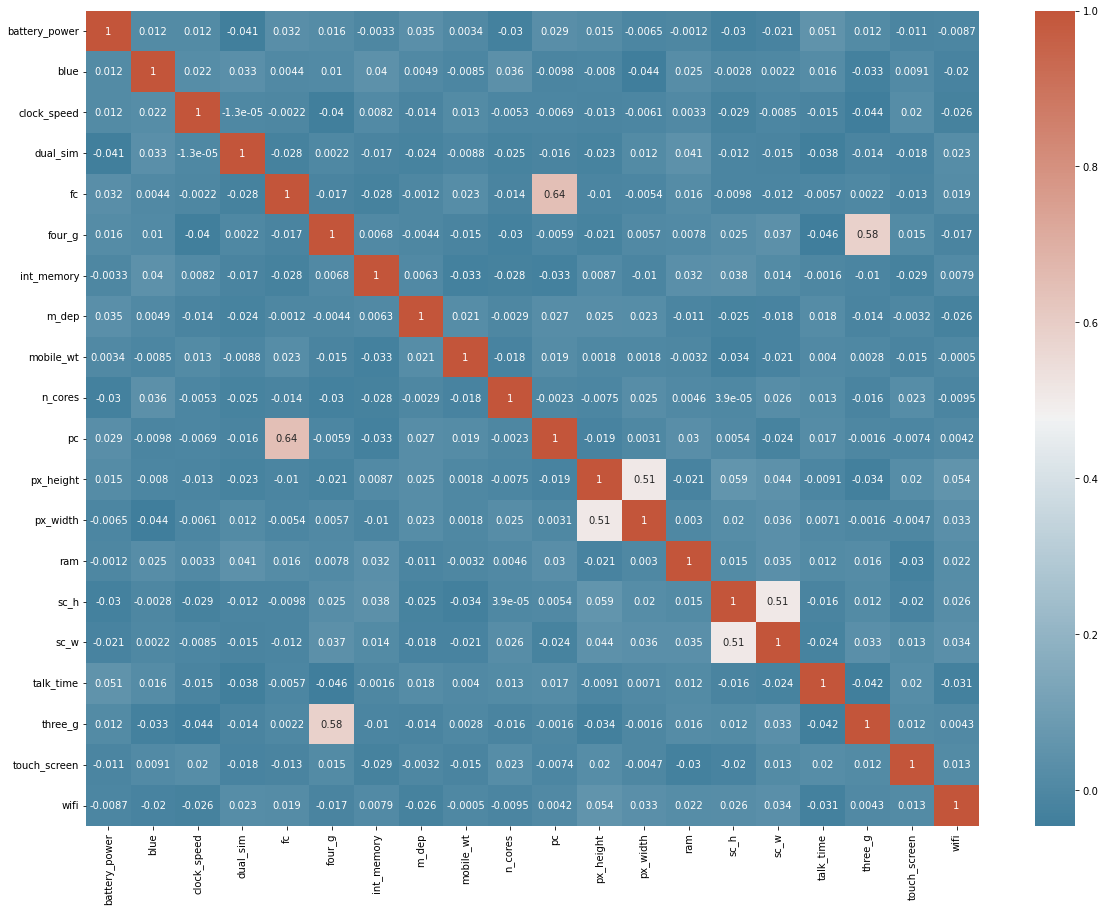

In [10]:
#corelation of features
corr = x.corr()
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

# Feature Selection Using ExtraTreesClassifier

In [11]:
ext = ExtraTreesClassifier()

In [12]:
ext.fit(x,y)

ExtraTreesClassifier()

In [13]:
#Feature Importance in terms of info gain
imp_features = ext.feature_importances_
imp_features

array([0.06104929, 0.02011372, 0.03426906, 0.02033729, 0.03298227,
       0.01775389, 0.03665129, 0.03427472, 0.03671109, 0.03358754,
       0.03530251, 0.04685963, 0.04805958, 0.38306962, 0.03409731,
       0.03502114, 0.03594883, 0.0141472 , 0.0189323 , 0.02083171])

In [14]:
#DataFrame Create
features_ext = pd.DataFrame({
    'Features Name': x.columns,
    'Gain Score': imp_features
})

#DataFrame Print
features_ext

,Features Name,Gain Score
0,battery_power,0.061049
1,blue,0.020114
2,clock_speed,0.034269
3,dual_sim,0.020337
4,fc,0.032982
5,four_g,0.017754
6,int_memory,0.036651
7,m_dep,0.034275
8,mobile_wt,0.036711
9,n_cores,0.033588


In [15]:
#Best 18 features
new_x_ext = features_ext.nlargest(18, 'Gain Score')
new_x_ext

,Features Name,Gain Score
13,ram,0.383070
0,battery_power,0.061049
12,px_width,0.048060
11,px_height,0.046860
8,mobile_wt,0.036711
6,int_memory,0.036651
16,talk_time,0.035949
10,pc,0.035303
15,sc_w,0.035021
7,m_dep,0.034275


<Figure size 864x720 with 0 Axes>

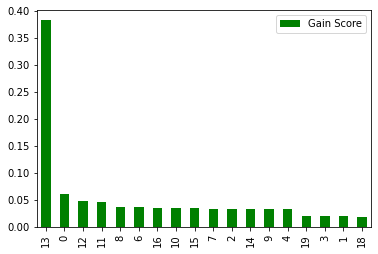

In [16]:
#Vertical Plot
features = pd.Series(imp_features, index=x.columns)
plt.figure(figsize=(12,10))
features_ext.nlargest(18, 'Gain Score').plot(kind='bar', color='green')
plt.savefig('ExtraTreesClassifier_Features.png')

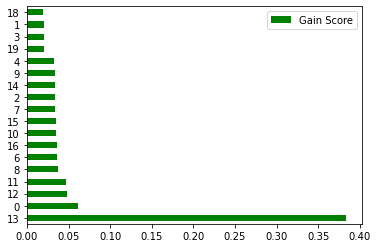

In [17]:
#Horizontal Plot
features_ext.nlargest(18, 'Gain Score').plot(kind='barh', color='green')
plt.savefig('ExtraTreesClassifier_Features_2.png')

# Feature Selection using SelectKBest

In [18]:
k_best = SelectKBest(score_func=f_regression)

In [19]:
k_best.fit(x,y)

SelectKBest(score_func=<function f_regression at 0x0000026A7801D040>)

In [20]:
#Important Features
imp_features_2 = k_best.scores_
imp_features_2

array([8.34506909e+01, 7.04649802e-01, 6.74156596e-02, 6.07709856e-01,
       9.88901069e-01, 4.62491022e-01, 3.76655641e+00, 1.72666686e-03,
       1.79828137e+00, 2.90384526e-02, 2.31549290e+00, 4.45799715e+01,
       5.56526691e+01, 1.05845261e+04, 9.64278030e-01, 2.94353819e+00,
       1.03771259e+00, 1.11359409e+00, 1.90287853e+00, 7.04717485e-01])

In [21]:
#DataFrame Create
features_k_best = pd.DataFrame({
    'Features Name': x.columns,
    'Feature Score': imp_features_2
})

#DataFrame Print
features_k_best

,Features Name,Feature Score
0,battery_power,83.450691
1,blue,0.704650
2,clock_speed,0.067416
3,dual_sim,0.607710
4,fc,0.988901
5,four_g,0.462491
6,int_memory,3.766556
7,m_dep,0.001727
8,mobile_wt,1.798281
9,n_cores,0.029038


In [22]:
new_x_k_best = features_k_best.nlargest(18, 'Feature Score')
new_x_k_best

,Features Name,Feature Score
13,ram,10584.526086
0,battery_power,83.450691
12,px_width,55.652669
11,px_height,44.579972
6,int_memory,3.766556
15,sc_w,2.943538
10,pc,2.315493
18,touch_screen,1.902879
8,mobile_wt,1.798281
17,three_g,1.113594


<Figure size 1080x1080 with 0 Axes>

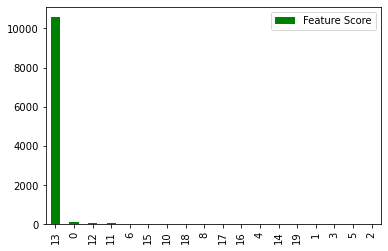

In [23]:
#Vertical Plot
features = pd.Series(imp_features_2, index=x.columns)
plt.figure(figsize=(15,15))
features_k_best.nlargest(18, 'Feature Score').plot(kind='bar', color='green')
plt.savefig('SelectKBest_Features.png')

<Figure size 1080x1080 with 0 Axes>

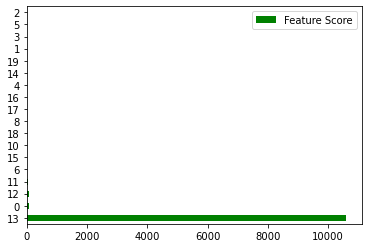

In [24]:
#Horizontal Plot
features = pd.Series(imp_features_2, index=x.columns)
plt.figure(figsize=(15,15))
features_k_best.nlargest(18, 'Feature Score').plot(kind='barh', color='green')
plt.savefig('SelectKBest_Features_2.png')